In [1]:
import pandas as pd
import numpy as np

In [19]:
mapping = pd.read_csv("../csv_files/bookstore_csv/mapping.csv")
d_type = {"commit_hash" : "str", 	"num_additions" : int,	"num_deletions": int, "filename" : "str"}

def load_data(file):
    df = pd.read_csv(file)
    df = df[df.filename.str.endswith(".java")]
    return pd.DataFrame({"commit_hash": df.commit_hash, "changes": pd.to_numeric(df.num_additions) + pd.to_numeric(df.num_deletions), "filename": df.filename})

data_java = load_data("../csv_files/bookstore_csv/output_java.csv")
data_ast = load_data("../csv_files/bookstore_csv/output_ast.csv")
data_java_nws = load_data("../csv_files/bookstore_csv/output_nws.csv")

In [3]:
mapping

,from,to
0,8a3399aec8341c0766a49826a023bb6b24562ec1,be9474a1320a2585581151aa211cf662595f593e
1,a1e77a023e1449d6f1d6bb4fc321e537c1c91432,566fe922671b6a1941400d381e63ce20c04d953a
2,7ee02cf2e1405fb376a7f0d9f10c53628ba18373,1c0a15bde391be864031fabdfb0389a2d5e5d8df
3,9f0a5c0e2efd594dfc93a7440f8965860b0fcfe0,ae9b5426c6c3da90531945dd539dee95f7a35cff
4,38443e531a68d35f9c3be2fcdbe749b3da232963,130f2baf932c7ea9c2885581b92b420091c7ce63
...,...,...
190,59e4f86a4d265dd166aaabb5fd3277b07668881f,29db0fdb898d8e9a67ba6d9d606f2e8e7bcf26b0
191,04bfbd44fc64324dceab22b069c90bb723ea9c49,e9d12bae3cc9fd9c856575e3f15a180b4ab37dc7
192,7f69dcee1135798e8b06e2fbf8539f7f04adb6d6,673aaee97c59baaccc653a37e6989bd01297e78c
193,011fad3dc5cd82ee511b196130f5ea7b54cc6ea0,c8876b959f65f3eedcc4b35700398d8aaece0452


In [4]:
data_ast

,commit_hash,changes,filename
0,c8876b959f65f3eedcc4b35700398d8aaece0452,21,src/main/java/com/bittercode/util/StoreUtil.java
1,c8876b959f65f3eedcc4b35700398d8aaece0452,18,src/main/java/servlets/CartServlet.java
2,c8876b959f65f3eedcc4b35700398d8aaece0452,114,src/main/java/servlets/ViewBookServlet.java
8,29db0fdb898d8e9a67ba6d9d606f2e8e7bcf26b0,435,src/main/java/com/bittercode/util/StoreUtil.java
9,29db0fdb898d8e9a67ba6d9d606f2e8e7bcf26b0,200,src/main/java/servlets/AboutServlet.java
...,...,...,...
532,566fe922671b6a1941400d381e63ce20c04d953a,450,OnlineBookStore/src/test/ReceiptServlet.java
533,566fe922671b6a1941400d381e63ce20c04d953a,208,OnlineBookStore/src/test/RemoveBookServlet.java
534,566fe922671b6a1941400d381e63ce20c04d953a,240,OnlineBookStore/src/test/UserLoginServlet.java
535,566fe922671b6a1941400d381e63ce20c04d953a,313,OnlineBookStore/src/test/UserRegisterServlet.java


In [5]:
data_java

,commit_hash,changes,filename
0,011fad3dc5cd82ee511b196130f5ea7b54cc6ea0,25,src/main/java/com/bittercode/util/StoreUtil.java
1,011fad3dc5cd82ee511b196130f5ea7b54cc6ea0,20,src/main/java/servlets/CartServlet.java
2,011fad3dc5cd82ee511b196130f5ea7b54cc6ea0,65,src/main/java/servlets/ViewBookServlet.java
8,59e4f86a4d265dd166aaabb5fd3277b07668881f,105,src/main/java/com/bittercode/util/StoreUtil.java
9,59e4f86a4d265dd166aaabb5fd3277b07668881f,35,src/main/java/servlets/AboutServlet.java
...,...,...,...
540,a1e77a023e1449d6f1d6bb4fc321e537c1c91432,75,OnlineBookStore/src/test/ReceiptServlet.java
541,a1e77a023e1449d6f1d6bb4fc321e537c1c91432,39,OnlineBookStore/src/test/RemoveBookServlet.java
542,a1e77a023e1449d6f1d6bb4fc321e537c1c91432,42,OnlineBookStore/src/test/UserLoginServlet.java
543,a1e77a023e1449d6f1d6bb4fc321e537c1c91432,47,OnlineBookStore/src/test/UserRegisterServlet.java


In [27]:
df_ast = pd.merge(data_ast, mapping, left_on="commit_hash", right_on="to", validate="m:1", how="left").rename(columns = {"from": "commit_hash", "commit_hash": "commit_hash_ast"}).drop(columns=["to", "commit_hash_ast"]).set_index(["commit_hash", "filename"])

In [7]:
df_java = data_java.set_index(["commit_hash", "filename"])


In [20]:
df_java_nws = data_java_nws.set_index(["commit_hash", "filename"])

In [29]:
def mergeall(**dfs):
    from functools import reduce
    items = dfs.items()
    table = df_java.rename(columns = dict(changes="repo"))
    for key, df in items:
        table = pd.merge(table, df.rename(columns = dict(changes=key)), left_index=True, right_index=True, validate="1:1", how="outer")
    return table

df_merged = mergeall(token= df_ast, nws= df_java_nws).fillna(0, downcast="int64")
df_merged.isna().sum()

repo     0
token    0
nws      0
dtype: int64

<Axes: xlabel='commit_hash,filename'>

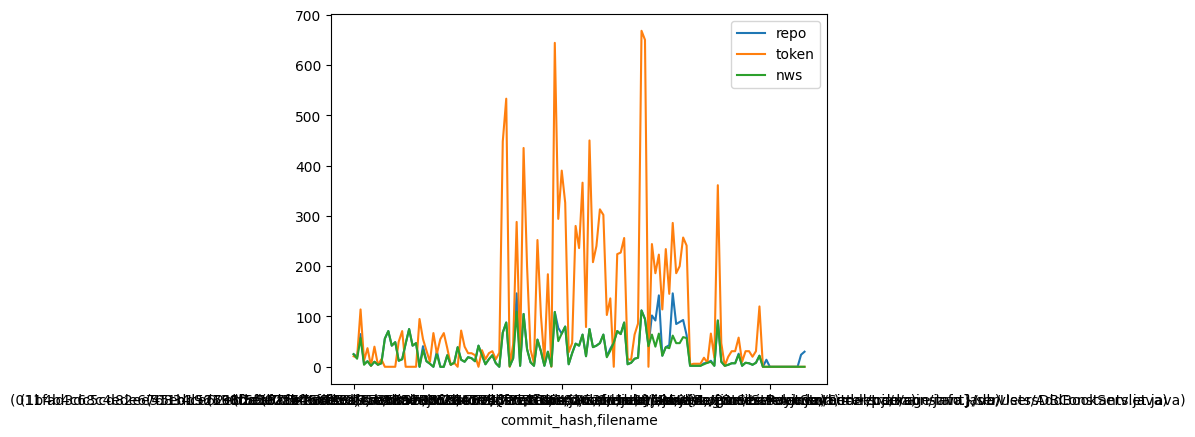

In [30]:
df_merged.plot()

<Axes: >

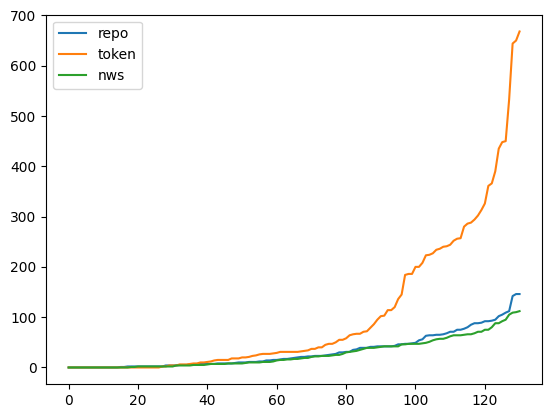

In [31]:
df = pd.DataFrame({k : np.array(df_merged[k].sort_values()) for k in df_merged.columns})
df.plot()

<Axes: >

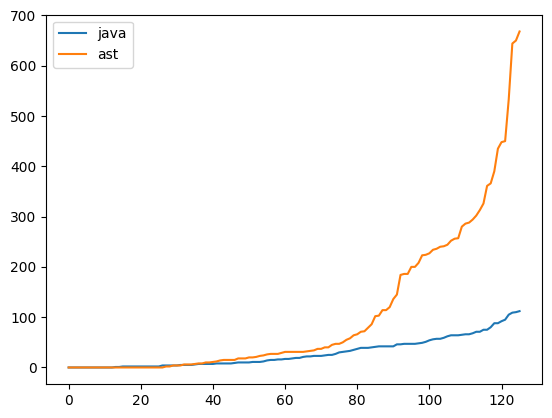

In [22]:
df_nws = pd.DataFrame({"java": np.array(df_merged_nws.changes.sort_values()), "ast": np.array(df_merged_nws.changes_ast.sort_values())})
df_nws.plot()

<Axes: >

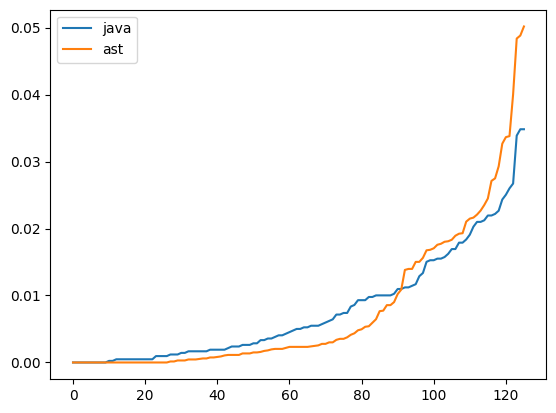

In [10]:
df = pd.DataFrame({"java": np.array(df_merged.changes.sort_values()), "ast": np.array(df_merged.changes_ast.sort_values())})
(df / df.sum()).plot()

,java,ast
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
121,109,450
122,112,533
123,142,644
124,146,650


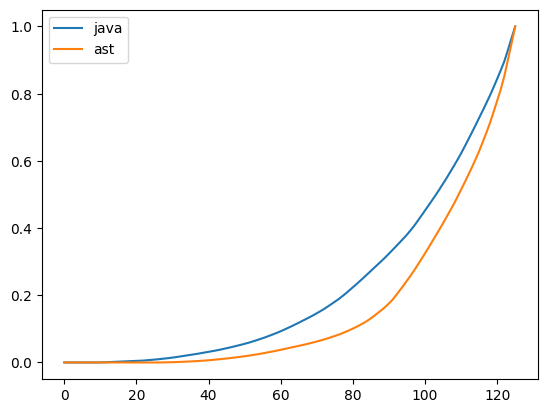

In [11]:
df = pd.DataFrame({"java": np.array(df_merged.changes.sort_values()), "ast": np.array(df_merged.changes_ast.sort_values())})
(df.cumsum() / df.sum()).plot()
df

<Axes: >

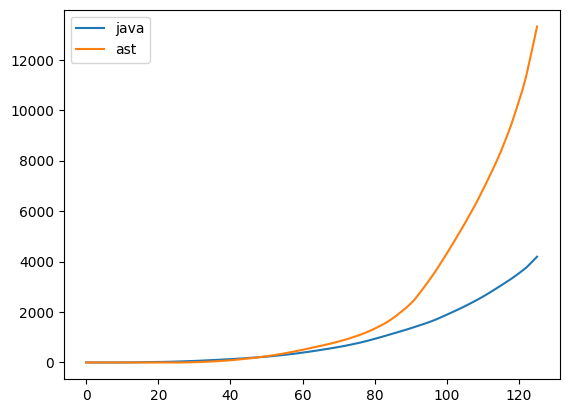

In [12]:
df = pd.DataFrame({"java": np.array(df_merged.changes.sort_values()), "ast": np.array(df_merged.changes_ast.sort_values())})
df.cumsum().plot()

<Axes: xlabel='commit_hash,filename'>

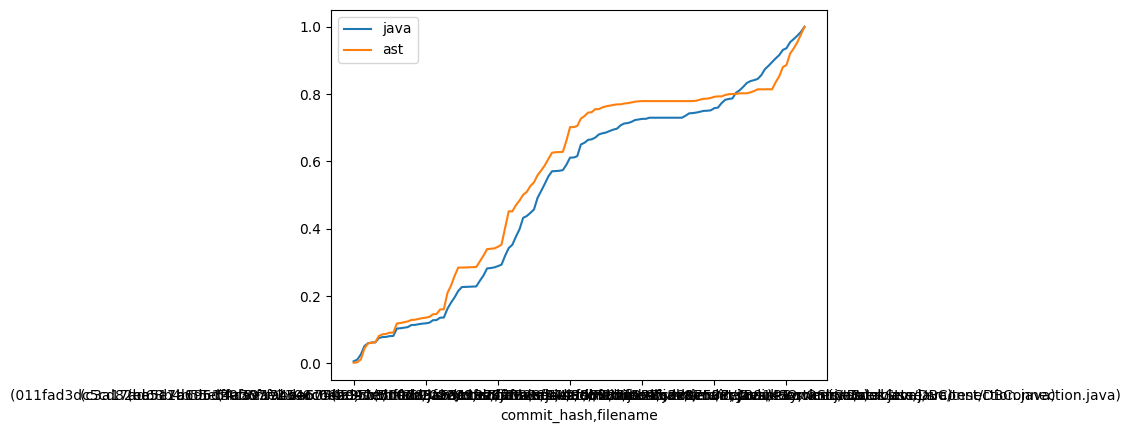

In [13]:
df = pd.DataFrame({"java": df_merged.changes, "ast": df_merged.changes_ast})
(df.cumsum() / df.sum()).plot()

In [36]:
#find størrelsen af filen for at finde en relativ ændring 
df_merged[df_merged.token == 0][df_merged.nws != 0]

C:\Users\boran\AppData\Local\Temp\ipykernel_11832\4186556791.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_merged[df_merged.token == 0][df_merged.nws != 0]


repo  \
commit_hash                              filename                                                   
1b4b4c68c4ede676834ce62eb2d1f014fe3489a7 OnlineBookStore/servlets/AddBookServlet.java          56   
                                         OnlineBookStore/servlets/ReceiptServlet.java          71   
                                         OnlineBookStore/servlets/UserLoginServlet.java        42   
                                         OnlineBookStore/servlets/UserRegisterServlet.java     49   
                                         OnlineBookStore/src/test/AddBookServlet.java          46   
                                         OnlineBookStore/src/test/ReceiptServlet.java          75   
                                         OnlineBookStore/src/test/UserLoginServlet.java        42   
                                         OnlineBookStore/src/test/UserRegisterServlet.java     47   
45edd52796dc2025b46c9592678dc9be5f2b4178 src/main/java/config/DBConnection.java                39   
                                         src/main/java/servlets/DBConnection.java              42   
4a307fabea604be9cb5bf92a5c65c29e9f0028f4 src/main/java/servlets/ReceiptServlet.java             1   
668f6fb87f546fdb6d61b19913868ae6cb37c588 src/main/java/com/bittercode/service/impl/UserS...     1   
ba5e7a6d5df4ca95e2306c062947e5df3b1026cd src/main/java/com/bittercode/config/DBUtil.java       48   
                                         src/main/java/config/DBConnection.java                41   

                                                                                             token  \
commit_hash                              filename                                                    
1b4b4c68c4ede676834ce62eb2d1f014fe3489a7 OnlineBookStore/servlets/AddBookServlet.java            0   
                                         OnlineBookStore/servlets/ReceiptServlet.java            0   
                                         OnlineBookStore/servlets/UserLoginServlet.java          0   
                                         OnlineBookStore/servlets/UserRegisterServlet.java       0   
                                         OnlineBookStore/src/test/AddBookServlet.java            0   
                                         OnlineBookStore/src/test/ReceiptServlet.java            0   
                                         OnlineBookStore/src/test/UserLoginServlet.java          0   
                                         OnlineBookStore/src/test/UserRegisterServlet.java       0   
45edd52796dc2025b46c9592678dc9be5f2b4178 src/main/java/config/DBConnection.java                  0   
                                         src/main/java/servlets/DBConnection.java                0   
4a307fabea604be9cb5bf92a5c65c29e9f0028f4 src/main/java/servlets/ReceiptServlet.java              0   
668f6fb87f546fdb6d61b19913868ae6cb37c588 src/main/java/com/bittercode/service/impl/UserS...      0   
ba5e7a6d5df4ca95e2306c062947e5df3b1026cd src/main/java/com/bittercode/config/DBUtil.java         0   
                                         src/main/java/config/DBConnection.java                  0   

                                                                                             nws  
commit_hash                              filename                                                 
1b4b4c68c4ede676834ce62eb2d1f014fe3489a7 OnlineBookStore/servlets/AddBookServlet.java         56  
                                         OnlineBookStore/servlets/ReceiptServlet.java         71  
                                         OnlineBookStore/servlets/UserLoginServlet.java       42  
                                         OnlineBookStore/servlets/UserRegisterServlet.java    49  
                                         OnlineBookStore/src/test/AddBookServlet.java         46  
                                         OnlineBookStore/src/test/ReceiptServlet.java         75  
                                         OnlineBook

In [59]:
from tree_sitter import Language, Parser

from formast.__main__ import JAVA_LANGUAGE

parser = Parser()
parser.set_language(JAVA_LANGUAGE)



with open("..\java_files\example.java", "rb") as f:
    code = f.read()
tree = parser.parse(code)

tree.root_node.children[0].children[3].children

[<Node type="{", start_point=(0, 18), end_point=(0, 19)>,
 <Node type=method_declaration, start_point=(2, 2), end_point=(14, 3)>,
 <Node type="}", start_point=(15, 0), end_point=(15, 1)>]